*Prepared for the course "TDPS22: Data Science Programming" at Jönköping University, Teacher: [Marcel Bollmann](mailto:marcel.bollmann@ju.se)*

# Exercise 2: Visualization with Seaborn for Exploratory Data Analysis


This notebook contains exercises on data visualization using the Seaborn library. In particular, we'll focus on _exploratory data analysis:_ trying to understand your dataset better by producing plots. This exercise focuses on what different plot types there are, how to use them, and what they mean.

### Learning Goals

- Understand how to produce plots with the help of the Seaborn API.
- Know how to _find the right Seaborn functions_ for a given plot type.
- Know how to _interpret common plot types_ provided by Seaborn.

### Useful Resources

+ ["Visualization with Seaborn" in the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
+ ["Plotting with Pandas and Seaborn" in Python for Data Analysis](https://wesmckinney.com/book/plotting-and-visualization.html#vis_pandas)
+ [Seaborn User Guide & Tutorial](https://seaborn.pydata.org/tutorial.html)


In [1]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns

sns.set()

In [3]:
# Load a predefined dataset from Seaborn
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


- - - 
## Data cleaning

We can already see from the preview of `df` above that this dataset contains null values (`NaN`)! Let's recall our Pandas skills to tidy this up before we do anything else.

#### Useful Reference

+ ["Handling Missing Data" in the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)

**1. How many `NaN` values are there in each column?** This information might help us decide what strategy we want to use for cleaning the dataset.

In [4]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

**2. Drop all rows that contain `NaN` values from the dataset.** Make sure to assign the result to `df` so that for the remaining exercises, we're working with the cleaned dataset.

In [5]:
df = df.dropna()

**3. Find out which unique values there are for `species` and `island`, as well as the min/max/mean of the numeric columns.** This might be helpful in deciding how to visualize this dataset later!

In [6]:
print(df["species"].unique())
print(df["island"].unique())
df.describe()

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


- - -
## Plotting data distributions

Let's get a better what the idea looks like by visualizing it!
Maybe we want to know more about the **distribution** of our data. With functions like `df.describe()`, we already get a rough overview about minima, maxima, quantiles, averages, etc. – but plots can give us an ever better picture of the data.

#### Useful References

+ ["Plotting with Pandas and Seaborn" in Python for Data Analysis](https://wesmckinney.com/book/plotting-and-visualization.html#vis_pandas)
+ ["Visualizing distributions of data" in the Seaborn tutorial](https://seaborn.pydata.org/tutorial/distributions.html)

**4. Produce a histogram of the penguins' _body mass_ measurements with 12 bins.**  You could do this by using (a) the Pandas API, or (b) the Seaborn API. In practice (and in the assignments/exam), it does not matter _how_ you arrive at a solution – but it can be a good exercise to try out different ways to achieve the same result. How do the plots generated by these two different methods differ? Could you explain what they tell us about the distribution of the body mass?

<Figure size 432x288 with 1 Axes>

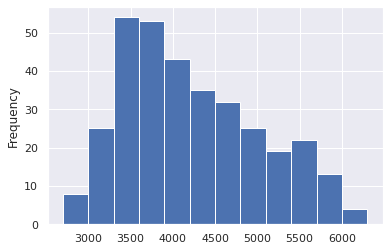

In [7]:
# via Pandas API:
df["body_mass_g"].plot.hist(bins=12);

<Figure size 360x360 with 1 Axes>

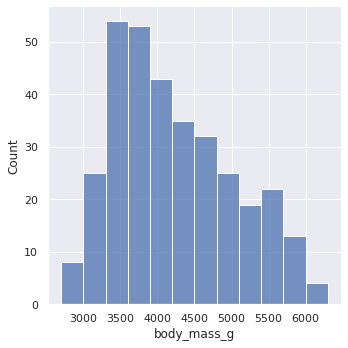

In [8]:
# via Seaborn API:
sns.displot(data=df, x="body_mass_g", bins=12);

<div class="alert alert-block alert-info">
<p>We can see that the default figure sizes & axis labels are slightly different between the two methods. (Of course, with some tweaking, we could make them look the same.)</p>

<p>The distribution of body mass seems to be centered around 3500–4000g, dropping off quickly towards the lower end, while tapering off slowly towards the higher end. In other words, it's unlikely for a penguin to be lighter than ~3500g, but they can get as heavy as 6000g in this dataset.</p>
</div>

<div class="alert alert-block alert-info">

If you're wondering about the semicolons at the end of the lines: without them, you'll get one extra line of output in Jupyter Notebook describing the object returned by the function. It's just for reducing visual clutter.

</div>

**5. Produce a histogram of _body mass_ that also conditions on _sex_.** In other words, play around with visualizations that show the distribution of body mass separately for male and female penguins.

There are different ways to do this: one is by using different colors (hues) in the histogram to distinguish male and female penguins. Seaborn makes this really, really easy! Focus on the Seaborn tutorial pages to figure out how to do this, and try out the different options Seaborn provides to combine the histogram bars (e.g., "stacking" vs. "layering" vs. "dodging"). Which option, in your opinion, provides the most useful visualization in this case?

<Figure size 439.725x360 with 1 Axes>

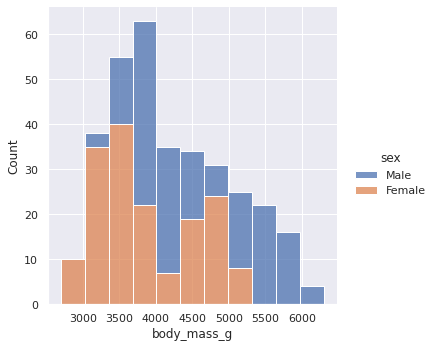

In [9]:
# This is just one possible way to do this:
sns.displot(data=df, x="body_mass_g", hue="sex", multiple="stack");

<div class="alert alert-block alert-info">
<p>I chose the "stacking" approach here because I find it easiest to read in this case, but "layering" might also work.</p>

<p>I think this visualization gives a pretty good impression of male penguins tending to be somewhat heavier than female penguins – which probably won't surprise any biologist!</p>
</div>

**6. Do the same but with different variables, e.g., "bill length" instead of "body mass", or "species" instead of "sex" as the conditional variable.** Remember, this is exploratory data analysis – you're trying to learn something about the dataset and get a better feel for how the data is distributed. There is no "right" or "wrong" plot to produce here, just plots that may be more or less useful for understanding the dataset.

<Figure size 439.725x360 with 1 Axes>

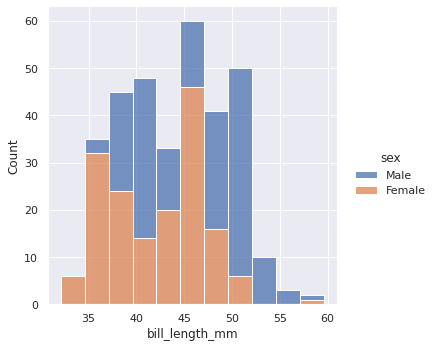

In [10]:
sns.displot(data=df, x="bill_length_mm", hue="sex", multiple="stack");

<div class="alert alert-block alert-info">Aha, so females also tend to have shorter bill lengths, it seems.</div>

<Figure size 452.85x360 with 1 Axes>

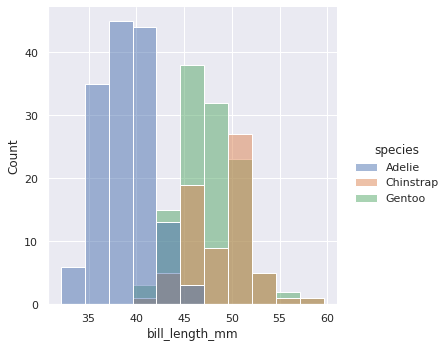

In [11]:
sns.displot(data=df, x="bill_length_mm", hue="species", multiple="layer");

<div class="alert alert-block alert-info">
<p>Adelie penguins tend to have shorter bills than the other species.</p>

<p>I tried <code>multiple="layer"</code> here as I felt stacking got a bit confusing with three levels of species, but you might feel differently.</p>
</div>

<Figure size 452.85x360 with 1 Axes>

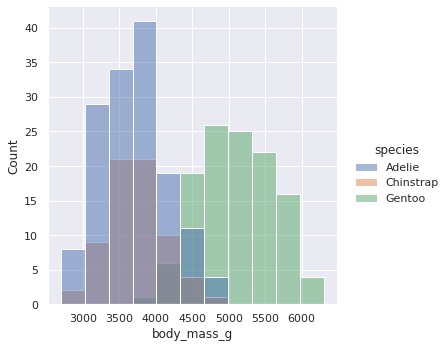

In [12]:
sns.displot(data=df, x="body_mass_g", hue="species", multiple="layer");

<div class="alert alert-block alert-info">Gentoo penguins seem to be heavier than the other species.</div>

**7. Turn one of your histograms into a KDE plot.** Again, Seaborn makes this easy by just changing one keyword argument. But what does that KDE plot tell you? How does it differ from the histogram? Which one do you find more useful on the variables you looked at?

<Figure size 452.85x360 with 1 Axes>

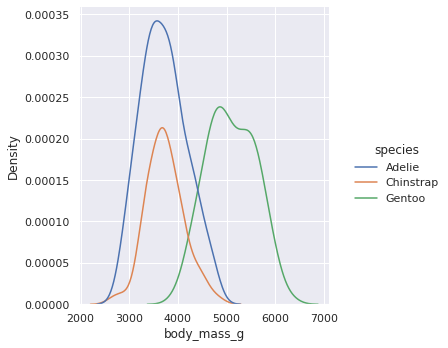

In [13]:
sns.displot(data=df, x="body_mass_g", hue="species", multiple="layer", kind="kde");

<div class="alert alert-block alert-info">
    
KDE plots are like histograms, but instead of discrete bins, they produce a continuous curve. From the [Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot):

> Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions. But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. 

<p>In this case, compared to the histogram of the same data, I feel it is definitely less cluttered and more interpretable!</p>
</div>

- - -
## Plotting relationships between variables

Previously, we visualized the distribution of one _numeric_ variable, optionally conditioned on one _categorical_ variable. Now, let's extend this to plot relationships between multiple numeric and/or categorical variables.

#### Useful References

+ ["Plotting with Pandas and Seaborn" in Python for Data Analysis](https://wesmckinney.com/book/plotting-and-visualization.html#vis_pandas)
+ ["Visualizing statistical relationships" in the Seaborn tutorial](https://seaborn.pydata.org/tutorial/relational.html)
+ ["Visualizing regression models" in the Seaborn tutorial](https://seaborn.pydata.org/tutorial/regression.html#visualizing-regression-models)

Let's show the relationship between two _numeric_ variables:

**8. Make a scatter plot showing the relationship between _bill length_ and _body mass_.**

<Figure size 360x360 with 1 Axes>

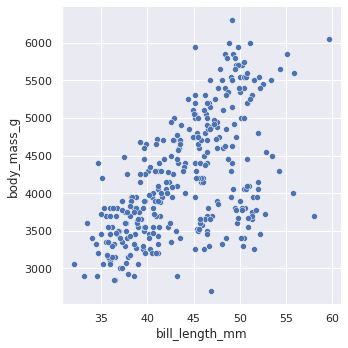

In [14]:
sns.relplot(data=df, x="bill_length_mm", y="body_mass_g");

Let's add a categorical variable, so that we're now visualizing _three_ different variables in one plot:

**9. Make the same scatter plot as in Q8, but add _color_ to condition on the _species_ of the penguins.**

<Figure size 452.85x360 with 1 Axes>

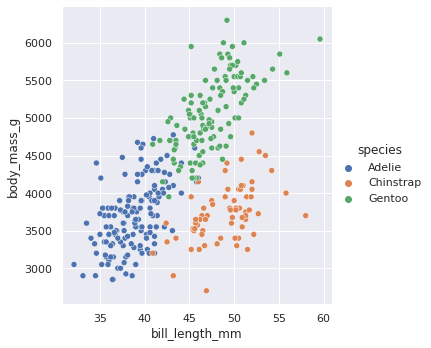

In [15]:
sns.relplot(data=df, x="bill_length_mm", y="body_mass_g", hue="species");

Seaborn can conveniently perform some basic _modelling_ on the data as well. Based on the plots above, we might feel pretty sure that there's strong correlation between _bill length_ and _body mass_, but we can also quickly perform & plot a linear regression model to support this.

**10. Plot a _linear regression_ between _bill length_ and _body mass_, both with and without conditioning on the _species_.**

<Figure size 432x288 with 1 Axes>

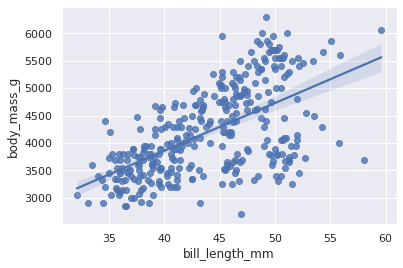

In [16]:
sns.regplot(data=df, x="bill_length_mm", y="body_mass_g");

<Figure size 452.85x360 with 1 Axes>

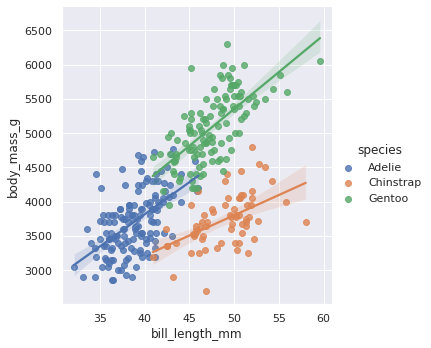

In [17]:
sns.lmplot(data=df, x="bill_length_mm", y="body_mass_g", hue="species");

Let's extend our visualization to _four_ variables. Seaborn offers "facet grids" as a way to quickly produce multiple plots in a grid, where the columns (and/or rows) now represent our fourth variable.

**11. Make a _facet grid_ that's the same as Q9, but distinguishes the _sex_ of the penguins in separate columns.**

<Figure size 812.85x360 with 2 Axes>

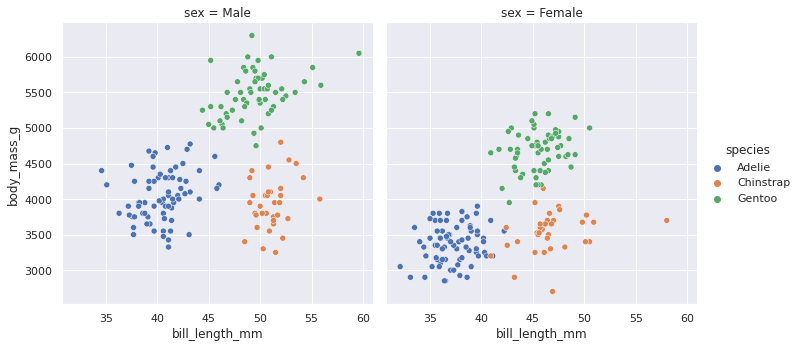

In [18]:
sns.relplot(data=df, x="bill_length_mm", y="body_mass_g", hue="species", col="sex");

- - - 
## Plotting categorical data

Columns like "species" or "sex" represent _categorical_ variables. We've used them in the plots above before, but let's look at some plot types specifically made for categorical data.


#### Useful References

+ ["Plotting with Pandas and Seaborn" in Python for Data Analysis](https://wesmckinney.com/book/plotting-and-visualization.html#vis_pandas)
+ ["Plotting with categorical data" in the Seaborn tutorial](https://seaborn.pydata.org/tutorial/categorical.html)

We've previously looked at _histograms_ to see, e.g., the distribution of _bill length_ by _species_. We did this by distinguishing the different _species_ by color in a single histogram. We can also do that with a categorical scatter plot and/or box plot.

**12. Make a _categorical scatter plot_ that uses _species_ as the categorical variable, and _bill length_ as the numeric variable.** If you haven't plotted the same relationship as a histogram already (in Q6), do this too, and compare this scatter plot and the histogram. Can you see that they visualize the same information? Which one do you find more useful here?

<Figure size 360x360 with 1 Axes>

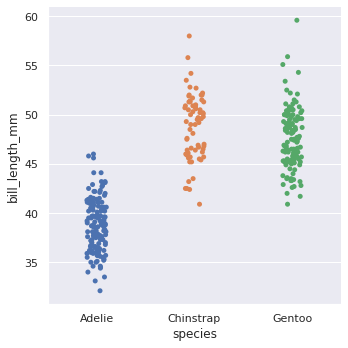

In [19]:
sns.catplot(data=df, x="species", y="bill_length_mm");

<div class="alert alert-block alert-info">
This plot also clearly shows that Adelie penguins have shorter bills. I would say that it's a bit easier to notice the outliers in this plot compared to a histogram, and that the "Adelie" and "Gentoo" distributions look a bit more homogenous than the "Chinstrap" one, which has a bit of a "gap" in the middle.
</div>

**13. Make a _box plot_ analogous to Q12, i.e., using _species_ as the categorical variable, and _bill length_ as the numeric variable.** Do you know how to interpret the resulting plot? What do the boxes and lines mean?

<Figure size 360x360 with 1 Axes>

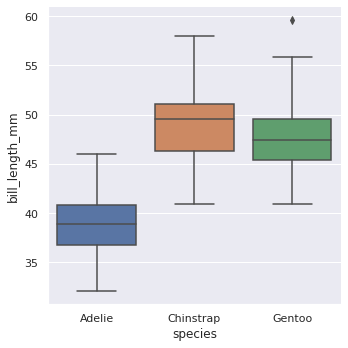

In [20]:
sns.catplot(data=df, x="species", y="bill_length_mm", kind="box");

<div class="alert alert-block alert-info">

From the [Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot):

> The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

"Quartiles" are the points you get when divide your dataset into four equally large pieces. That means:
- The lower and upper end of the "whiskers" show the minimum and maximum values of the distribution (except for certain outliers; here, we can see one outlier in the Gentoo distribution).
- The box itself shows the range of values between the 25th and 75th _percentile_, i.e., values which are larger than the bottom 25% and lower than the top 25%. Half of all observations fall within this range.
- The horizontal line within the box shows the _median_ of the distribution, i.e. the value that divides the distribution in two equally-sized halves.

</div>

A categorical variable we haven't looked at so far is the _island_ where the penguins live. Let's see how many penguins of each _species_ live on each _island_.

**14. Make a _bar plot_ showing the count of penguins, conditioned on _island_ and _species_.** (_Hint:_ Seaborn calls this a "count plot".)

<Figure size 432x288 with 1 Axes>

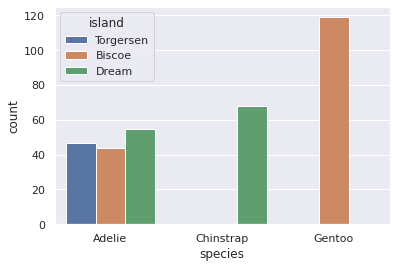

In [21]:
sns.countplot(data=df, x="species", hue="island");

<div class="alert alert-block alert-info">
Only Adelie penguins can be found on <em>each</em> of the three islands! This could be quite important if we want to train a model on our dataset.</div>

- - -
## Plotting time series data

Since the Penguins dataset doesn't really contain any time series, let's turn to the coffee chain dataset from the last exercise again. We'll load it and make sure the `Ddate` column contains an actual Datetime object:

In [22]:
coffee = pd.read_csv("data/coffee-chain.csv")
coffee["Ddate"] = coffee["Ddate"].transform(pd.to_datetime)

**15. Make a _line plot_ showing the relationship between _date_ and _sales_.**

<Figure size 360x360 with 1 Axes>

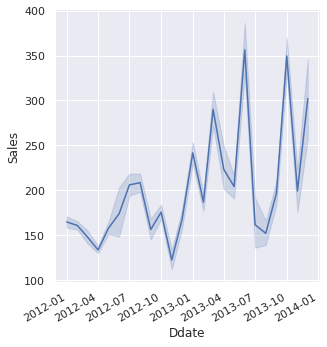

In [23]:
g = sns.relplot(data=coffee, x="Ddate", y="Sales", kind="line")
g.figure.autofmt_xdate()

<div class="alert alert-block alert-info">
<p>Note that Seaborn automatically sorts by date; we don't need to care about the order in which the observations appear in our dataset!</p>

The second line, `g.figure.autofmt_xdate()`, is taken from [this example in the Seaborn documentation](https://seaborn.pydata.org/tutorial/relational.html#emphasizing-continuity-with-line-plots) and simply makes the *x*-axis labels nicer to read.

</div>

We have several numeric values in this dataset: _sales, profit,_ and _expenses._ It would make sense to combine all three in a single plot, distinguishing them by color. But we're running into a small problem here: these observations are in different _columns_ of the DataFrame. To use precise terminology, these variables are represented as _wide-form data_.

**16. Make a _line plot_ showing the relationship between _date_ and the three numeric variables _sales, profit, expenses,_ plotted as separate lines in different colors.**

_Hint:_ Look at ["Data structures accepted by seaborn"](https://seaborn.pydata.org/tutorial/data_structure.html) to figure out how to plot _wide-form data_ as in our case here.

<Figure size 452.35x360 with 1 Axes>

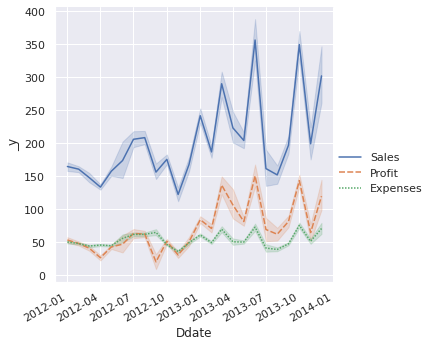

In [24]:
# Option 1: reshaping "coffee" to have "Ddate" as the index, and only the numeric values as columns.
# Seaborn interprets this as wide-form automatically, as explained in
# https://seaborn.pydata.org/tutorial/data_structure.html#wide-form-data
coffee_rs = coffee.set_index("Ddate")[["Sales", "Profit", "Expenses"]]
g = sns.relplot(data=coffee_rs, kind="line")
g.figure.autofmt_xdate()

<Figure size 452.35x360 with 1 Axes>

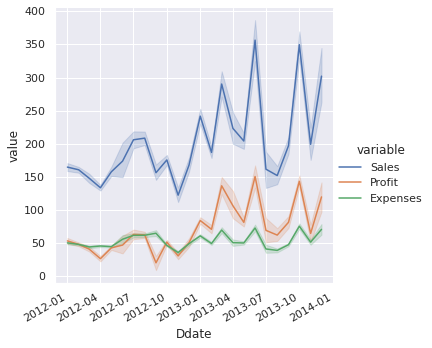

In [25]:
# Option 2: explicitly converting the DataFrame to long form via .melt()
coffee_melt = coffee.melt(id_vars=["Ddate"], value_vars=["Sales", "Profit", "Expenses"])
g = sns.relplot(data=coffee_melt, x="Ddate", y="value", hue="variable", kind="line")
g.figure.autofmt_xdate()